In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
def load_data():
    dataset = load_diabetes()
    X, y = pd.DataFrame(dataset.data), pd.Series(dataset.target)
    print(y)
    X.columns = dataset.feature_names
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
    return X_train, X_test, y_train, y_test

In [3]:

X_train, X_test, y_train, y_test = load_data()
X_train.shape

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64


(331, 10)

In [4]:
X_train['bmi'][:10]

386   -0.040696
233    0.036907
385   -0.019140
49     0.014272
229   -0.015906
277   -0.059019
211    0.036907
413   -0.000817
69    -0.046085
68    -0.029918
Name: bmi, dtype: float64

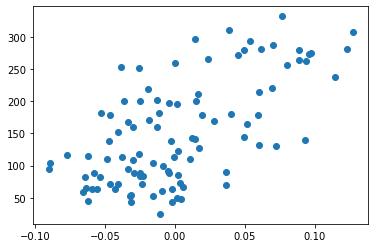

In [5]:
plt.scatter(X_train['bmi'][:100], y_train[:100])

[[ 148.09611308]
 [1024.72225741]]


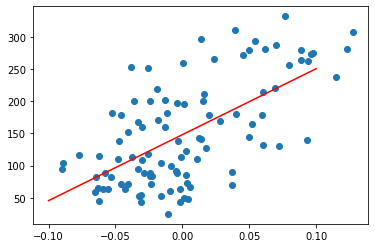

In [6]:
plt.scatter(X_train['bmi'][:100], y_train[:100])

#利用梯度下降寻找bmi和目标值的回归方程
##增加一列x0={1}，方便矩阵运算
x0=np.ones((100,1))
##将x_bmi转置成一列
x_bmi=np.array(X_train['bmi'][:100]).reshape(100,1)
##将x0与x_bmi合成自变量矩阵
x=np.hstack((x0,x_bmi))
##y_bmi转置成一列
y=np.array(y_train[:100]).reshape(100,1)

# 损失函数的偏导
def gradientFunction(theta, X, Y):
    diff = np.dot(X, theta) - Y
    return (1/100) * np.dot(X.transpose(), diff)

#迭代
def gradientDcent(X, Y, alpha):
    theta = np.array([1, 1]).reshape(2, 1)
    gradient = gradientFunction(theta, X, Y)
    while not all(abs(gradient) <= 1e-3):#当梯度小于该值时说明此时梯度变化不大，接近最小值
        theta = theta - alpha * gradient
        gradient = gradientFunction(theta, X, Y)
    return theta

theta=gradientDcent(x,y,0.01)
w0=theta[0][0]
w1=theta[1][0]
predict_x=np.linspace(-0.1,0.1,100)
predict_y=w0+predict_x*w1
plt.plot(predict_x, predict_y, '-r')
print(theta)

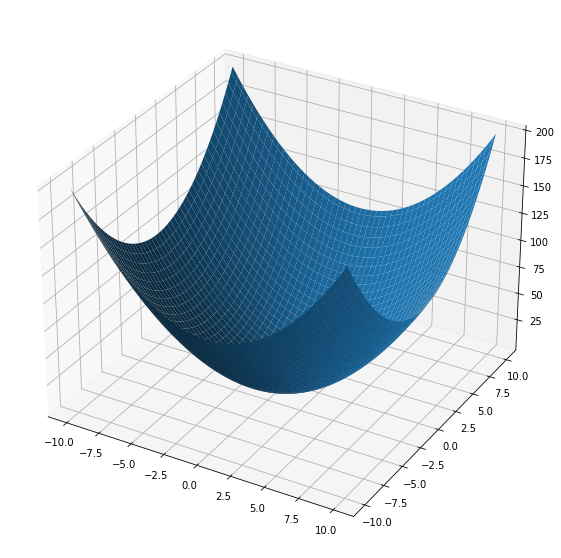

In [7]:
# Credit: https://my.oschina.net/Bettyty/blog/752867

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Example of a Surface Plot using Matplotlib
# Create x an y variables
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)

# We must create variables to represent each possible pair of points in x and y
# ie. (-10, 10), (-10, -9.8), ... (0, 0), ... ,(10, 9.8), (10,9.8)
# x and y need to be transformed to 100x100 matrices to represent these coordinates
# np.meshgrid will build a coordinate matrices of x and y
X, Y = np.meshgrid(x,y)

# Compute a 3D parabola 
Z = X**2 + Y**2 

# Open a figure to place the plot on
fig = plt.figure(figsize=(10, 10))
# Initialize 3D plot
ax = fig.gca(projection='3d')
# Plot the surface
ax.plot_surface(X=X,Y=Y,Z=Z)

plt.show()